# Лабораторная Работа №2
Шеввченко М.А.  
группа ИУ3-42М  
Вариант №12

In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller

In [2]:
DATA_PATH = os.path.join('data', 'Lab2', 'data.xlsx')

In [3]:
df = pd.read_excel(DATA_PATH)
points = df['Шевченко']

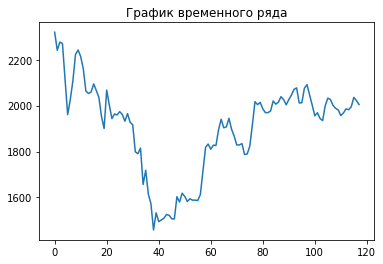

In [4]:
ax = plt.subplot()
ax.plot(points)
ax.set_title('График временного ряда')
plt.show()

## АКФ (АвтоКорреляционная функция)

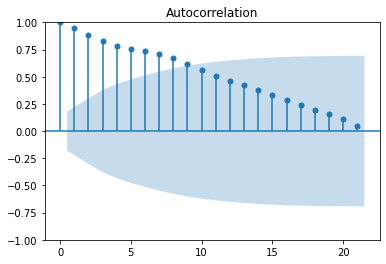

In [5]:
_ = tsaplots.plot_acf(points)

## ЧАКФ (Частная АвтоКорреляционная Функция)

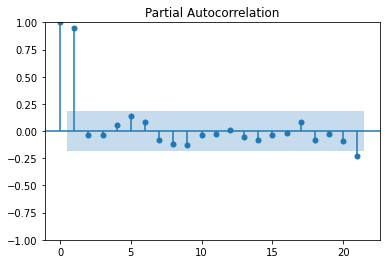

In [6]:
_ = tsaplots.plot_pacf(points, method='ywm')

## Тест Дики-Фуллера

Проверяем модель регрессии с константой и трендом ('ct').

In [7]:
results = adfuller(
    points,
    regression='ct',
    autolag='t-stat',
    store=True,
)
results[3].__dict__['resols'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     3.823
Date:                Thu, 21 Apr 2022   Prob (F-statistic):             0.0247
Time:                        21:14:51   Log-Likelihood:                -626.03
No. Observations:                 117   AIC:                             1258.
Df Residuals:                     114   BIC:                             1266.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0545      0.024     -2.249      0.026      -0.103      -0.006
const         87.2556     46.960      1.858      0.066      -5.771     180.282
x2             0.2340      0.141      1.655      0.101      -0.046       0.514
==============================================================================
Omnibus:                        7.871   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               14.463
Skew:                           0.147   Prob(JB):                     0.000723
Kurtosis:                       4.697   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__p-value__(const) = 0.066 > 0.05, __p-value__(x2) = 0.101 > 0.05 следовательно, результаты теста не актуальны для данной модели регресии.

Проверяем модель регресии только с константой ('c').

In [8]:
results = adfuller(
    points,
    regression='c',
    autolag='t-stat',
    store=True,
)
results[3].__dict__['resols'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.835
Date:                Thu, 21 Apr 2022   Prob (F-statistic):             0.0299
Time:                        21:14:51   Log-Likelihood:                -627.42
No. Observations:                 117   AIC:                             1259.
Df Residuals:                     115   BIC:                             1264.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0537      0.024     -2.199      0.030      -0.102      -0.005
const         99.4961     46.722      2.130      0.035       6.948     192.044
==============================================================================
Omnibus:                        7.430   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               12.978
Skew:                          -0.149   Prob(JB):                      0.00152
Kurtosis:                       4.604   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__p-value__(const) = 0.035 < 0.05. Смотрим на результаты __p-value__ всего теста.

In [9]:
display(results)

(-2.198815832489879,
 0.20667552205741363,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1c30cbea7f0>)

__p-value__ = 0.20 > 0.1, следовательно, мы не можем отвергнуть гипотезу о существовании нулевого корня.

Проверяем модель регресии без константы и тренда ('n')

In [10]:
results = adfuller(
    points,
    regression='n',
    autolag='t-stat',
    store=True,
)
results[3].__dict__['resols'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.5946
Date:                Thu, 21 Apr 2022   Prob (F-statistic):                       0.442
Time:                        21:14:51   Log-Likelihood:                         -629.68
No. Observations:                 117   AIC:                                      1261.
Df Residuals:                     116   BIC:                                      1264.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0020      0.003     -0.771      0.442      -0.007       0.003
==============================================================================
Omnibus:                        7.493   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               12.812
Skew:                          -0.172   Prob(JB):                      0.00165
Kurtosis:                       4.584   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
display(results)

(-0.7711244127141301,
 0.3826527107727524,
 {'1%': -2.585114358974359,
  '5%': -1.9435220495837635,
  '10%': -1.6147323393728696},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1c30cbfc400>)

__p-value__ = 0.38 > 0.1, следовательно, мы не можем отвергнуть гипотезу о существовании нулевого корня.

## Смотрим на разности первого порядка

### ct

In [12]:
results = adfuller(
    points.diff().dropna(),
    regression='ct',
    autolag='t-stat',
    store=True,
)
results[3].__dict__['resols'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     48.43
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           6.47e-16
Time:                        21:14:52   Log-Likelihood:                -622.55
No. Observations:                 116   AIC:                             1251.
Df Residuals:                     113   BIC:                             1259.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9175      0.093     -9.837      0.000      -1.102      -0.733
const        -12.3296      9.936     -1.241      0.217     -32.014       7.355
x2             0.1795      0.147      1.219      0.225      -0.112       0.471
==============================================================================
Omnibus:                        6.895   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.032   Jarque-Bera (JB):               12.168
Skew:                           0.064   Prob(JB):                      0.00228
Kurtosis:                       4.582   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### c

In [13]:
results = adfuller(
    points.diff().dropna(),
    regression='c',
    autolag='t-stat',
    store=True,
)
results[3].__dict__['resols'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     94.96
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.09e-16
Time:                        21:14:52   Log-Likelihood:                -623.31
No. Observations:                 116   AIC:                             1251.
Df Residuals:                     114   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9002      0.092     -9.745      0.000      -1.083      -0.717
const         -1.7824      4.891     -0.364      0.716     -11.472       7.908
==============================================================================
Omnibus:                        7.491   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               13.102
Skew:                          -0.155   Prob(JB):                      0.00143
Kurtosis:                       4.617   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### nc

In [14]:
results = adfuller(
    points.diff().dropna(),
    regression='n',
    autolag='t-stat',
    store=True,
)
display(results)

(-9.775614887257548,
 3.1239115042728234e-17,
 {'1%': -2.585283683115339,
  '5%': -1.9435455883031285,
  '10%': -1.6147157895977695},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1c30cc33430>)

__p-value__ < 0.10 теста Дики-Фуллера для модели регрессии без константы и тренда, следовательно, гипотеза о существовании нулевого корня может быть отвергнута. __Ряд разностей первого порядка стационарен.__